In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from datetime import datetime
import matplotlib.pyplot as plt

import calendar

data_17_08 = pd.read_csv('data/properati/properati-AR-2017-08-01-properties-sell.csv')
data_17_02 = pd.read_csv('data/properati/properati-AR-2017-02-01-properties-sell.csv')
data_16_08 = pd.read_csv('data/properati/properati-AR-2016-08-01-properties-sell.csv')
data_16_02 = pd.read_csv('data/properati/properati-AR-2016-02-01-properties-sell.csv')
data_15_08 = pd.read_csv('data/properati/properati-AR-2015-08-01-properties-sell.csv')
data_15_02 = pd.read_csv('data/properati/properati-AR-2015-02-01-properties-sell.csv')
data_14_08 = pd.read_csv('data/properati/properati-AR-2014-08-01-properties-sell.csv')
data_14_02 = pd.read_csv('data/properati/properati-AR-2014-02-01-properties-sell.csv')
data_13_08 = pd.read_csv('data/properati/properati-AR-2013-08-01-properties-sell.csv')

In [2]:
data_frames = [data_17_08, data_17_02, data_16_08, data_16_02,data_15_08,data_15_02,data_14_08,data_14_02,data_13_08]
data = pd.concat(data_frames)

Analizamos si hay información duplicada

In [3]:
duplicated = data.duplicated()
duplicated.value_counts()

False    672495
True      18055
dtype: int64

In [4]:
data = data.drop_duplicates(keep='first')
data.duplicated().value_counts()

False    672495
dtype: int64

# Estructura de los datos

In [5]:
data.head(3)

,country_name,created_on,currency,description,expenses,extra,floor,geonames_id,id,image_thumbnail,...,price_per_m2,price_usd_per_m2,properati_url,property_type,rooms,state_name,surface_covered_in_m2,surface_in_m2,surface_total_in_m2,title
0,Argentina,2012-09-19,USD,CASA CON LOCAL EN VENTA EN PADUA.2 DORMITORIOS...,NaN,NaN,NaN,3429244.0,c8a66ee9e3da083ab66dacd165e8a5cc718b1cf2,https://thumbs4.properati.com/1/ufoyqwscVk8n3e...,...,1290.322581,360.36036,http://www.properati.com.ar/udh_venta_casa_mer...,house,NaN,Bs.As. G.B.A. Zona Oeste,93.0,NaN,333.0,CASA EN VENTA
1,Argentina,2012-10-22,USD,CHALET VENTA 4 AMBIENTES PADUA.EXCELENTE CHALE...,NaN,NaN,NaN,3429244.0,a205c53378e7879cf7519659317fb410c060d20e,https://thumbs4.properati.com/5/I5RS_jAIUseo9H...,...,1000.000000,1000.00000,http://www.properati.com.ar/20hi_venta_casa_me...,house,NaN,Bs.As. G.B.A. Zona Oeste,220.0,NaN,220.0,CASA EN VENTA
2,Argentina,2012-11-01,NaN,DTO. 2 AMB. C/ VISTA PLENA AL 6 X 3DOMITORIO ...,NaN,NaN,NaN,3430863.0,e06d6f864a0b91346594da4d27ceddcef0947ea6,https://thumbs4.properati.com/5/VjDOdzm9n8uqZu...,...,NaN,NaN,http://www.properati.com.ar/336o_venta_departa...,apartment,2.0,Buenos Aires Costa Atlántica,42.0,NaN,NaN,DTO. 2 AMB. C/ VISTA PLENA AL MAR


In [6]:
data.dtypes

country_name                   object
created_on                     object
currency                       object
description                    object
expenses                       object
extra                          object
floor                         float64
geonames_id                   float64
id                             object
image_thumbnail                object
lat                           float64
lat-lon                        object
lon                           float64
operation                      object
place_name                     object
place_with_parent_names        object
price                         float64
price_aprox_local_currency    float64
price_aprox_usd               float64
price_per_m2                  float64
price_usd_per_m2              float64
properati_url                  object
property_type                  object
rooms                         float64
state_name                     object
surface_covered_in_m2         float64
surface_in_m

Convertimos created_on al formato de fechas 

In [7]:
data.created_on = pd.to_datetime(data.created_on, format='%Y/%m/%d')
data['year'] = data['created_on'].map(lambda x: x.year)
data['month'] = data.created_on.dt.month.apply(lambda x: calendar.month_name[x])
data['Periodo'] = data['created_on'].map(lambda x: x.strftime('%Y-%m'))


Analizamos los state_name para poder filtrar 

In [8]:
data['state_name'].value_counts()

Capital Federal                 75936
Bs.As. G.B.A. Zona Norte        71644
Bs.As. G.B.A. Zona Oeste        38830
Buenos Aires Costa Atlántica    34923
Bs.As. G.B.A. Zona Sur          27249
Córdoba                         23184
Santa Fe                        19766
Buenos Aires Interior            8841
Mendoza                          1812
Río Negro                        1762
Neuquén                          1601
Misiones                         1560
Entre Ríos                       1462
Tucumán                          1052
San Luis                          731
Salta                             684
Corrientes                        675
La Pampa                          520
Chubut                            437
Catamarca                         325
Chaco                             154
Tierra Del Fuego                  134
San Juan                          110
Jujuy                              80
Santa Cruz                         69
Formosa                            66
La Rioja    

Nos interesa solamente Capital Federal y Gran Buenos Aires, por lo tanto nos quedamos con los avisos que tengan esos state_name

In [9]:
data = data.loc[(data.state_name=='Capital Federal') | (data.state_name.str.contains('G.B.A'))]

In [10]:
data.isnull().sum()

country_name                       0
created_on                         0
currency                       21677
description                       15
expenses                      188200
extra                         213659
floor                         191175
geonames_id                    45482
id                                 0
image_thumbnail                 4299
lat                            69652
lat-lon                        69652
lon                            69652
operation                          0
place_name                        54
place_with_parent_names            0
price                          18416
price_aprox_local_currency     18416
price_aprox_usd                18416
price_per_m2                   43603
price_usd_per_m2               78930
properati_url                      0
property_type                      0
rooms                         110804
state_name                         0
surface_covered_in_m2          26893
surface_in_m2                 213659
s

In [11]:
data.place_name.value_counts()

Nordelta                               9236
Tigre                                  7993
Ramos Mejía                            7351
Palermo                                6581
Belgrano                               6534
La Plata                               5405
Pilar                                  5330
Caballito                              4774
Olivos                                 4461
Ituzaingó                              3682
Villa Crespo                           3552
Morón                                  3379
Capital Federal                        3361
Recoleta                               3322
Villa Urquiza                          3173
Martínez                               3106
Benavidez                              3090
San Isidro                             3049
Flores                                 2908
Haedo                                  2882
Almagro                                2880
Barrio Norte                           2774
San Miguel                      

In [12]:
data.describe()

,floor,geonames_id,lat,lon,price,price_aprox_local_currency,price_aprox_usd,price_per_m2,price_usd_per_m2,rooms,surface_covered_in_m2,surface_in_m2,surface_total_in_m2,year
count,22484.000000,1.681770e+05,144007.000000,144007.000000,1.952430e+05,1.952430e+05,1.952430e+05,1.700560e+05,1.347290e+05,102855.000000,186766.000000,0.0,153956.000000,213659.000000
mean,18.137653,3.488752e+06,-34.586982,-58.512142,3.390743e+05,4.349317e+06,2.565552e+05,4.476897e+03,2.032034e+03,2.990171,149.372300,NaN,263.548852,2016.308913
std,128.219977,4.031549e+05,0.872665,0.722749,7.751235e+05,6.431603e+06,3.785547e+05,1.989911e+04,5.366835e+03,1.493138,3326.294671,NaN,1685.679001,0.763184
min,1.000000,3.427208e+06,-41.167596,-122.419415,0.000000e+00,0.000000e+00,0.000000e+00,6.275958e-02,0.000000e+00,1.000000,0.000000,NaN,0.000000,2012.000000
25%,2.000000,3.429617e+06,-34.638378,-58.582103,1.000000e+05,1.596850e+06,9.500000e+04,1.521739e+03,1.088889e+03,2.000000,46.000000,NaN,52.000000,2016.000000
50%,3.000000,3.430787e+06,-34.599583,-58.478977,1.700000e+05,2.646675e+06,1.580000e+05,2.098361e+03,1.762712e+03,3.000000,79.000000,NaN,98.000000,2016.000000
75%,6.000000,3.435548e+06,-34.548170,-58.411855,3.300000e+05,4.940460e+06,2.900000e+05,2.935484e+03,2.451613e+03,4.000000,166.000000,NaN,243.000000,2017.000000
max,7071.000000,6.693230e+06,52.619706,5.011710,1.234568e+08,8.212711e+08,5.000000e+07,4.000000e+06,1.271027e+06,32.000000,987897.000000,NaN,200000.000000,2017.000000



Hay avisos de propiedades con pisos mayor a 54

¿más altos que el Alvear Tower?

https://es.wikipedia.org/wiki/Alvear_Tower

pudo haber un error en el ingreso de los datos, vamos a filtrar estas propiedades


In [13]:
data_pisos_54 = data[(data['floor'] > 54)]

# filtramos 1558 avisos
data_pisos_54.created_on.size


542

In [14]:
data = data[-(data['floor'] > 54)]
data.operation.value_counts()


sell    213117
Name: operation, dtype: int64

Según la descripción, también tenemos otros valores extremos como en surface_total_in_m2 y también en price_usd_per_m2. Se va a analizar cuántos avisos superan los 9,100 USD en price_usd_per_m2 (el precio más caro por el momento :https://www.clarin.com/ciudades/puerto-madero-cord-metro-cuadrado-subi-15-2016-cuesta-100-lares_0_By_5wqALg.html ), para ver que tan confiable es el set de datos.Solamente se van a descartar avisos según el análisis que se haga para no perder información importante,ya que en algunos casos puede haber sólo un campo que tenga información mal ingresada.

In [16]:
data.loc[data.price_usd_per_m2>9200,'operation'].count()

1096

# ¿Qué cantidad de avisos se registraron por año?

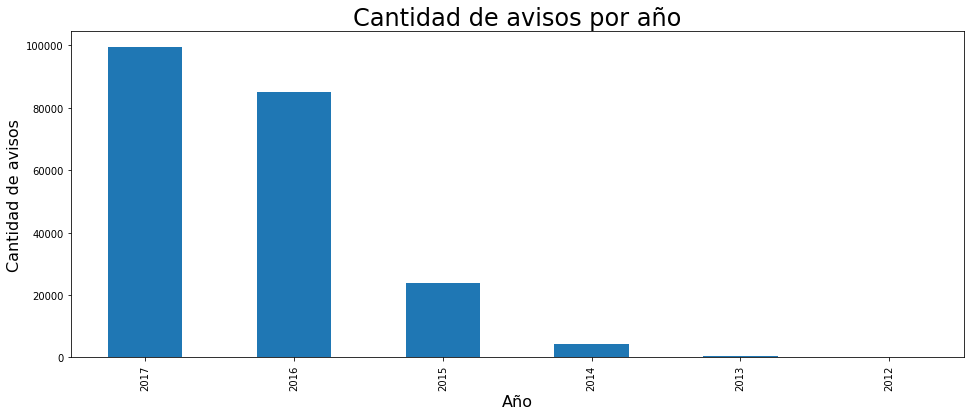

In [17]:
fig = plt.figure()

ax = data['year'].value_counts()[0:6].plot(kind='bar',figsize=(16,6));

plt.title('Cantidad de avisos por año', fontsize=24)

ax.set_xlabel('Año', fontsize= 16)
ax.set_ylabel('Cantidad de avisos', fontsize= 16)

#fig.savefig('top20CantidadDeAvisos.jpg');

In [18]:
# puede obsevase que la mayor cantidad de avisos se publicaron en el año 2017, si bien es poca la diferencia
# con respecto al año 2016 esta diferencia podría ser aún mayor al terminar el año 2017 ya los datos registrados para este
# año son hasta agosto

# ¿Cuáles son los meses en los cuales se da la mayor cantidad de avisos?

In [19]:
data.month.value_counts()

July         55268
February     18565
June         17315
January      16191
November     15218
May          14504
April        13996
December     13743
March        13219
October      13104
August       12799
September     9195
Name: month, dtype: int64

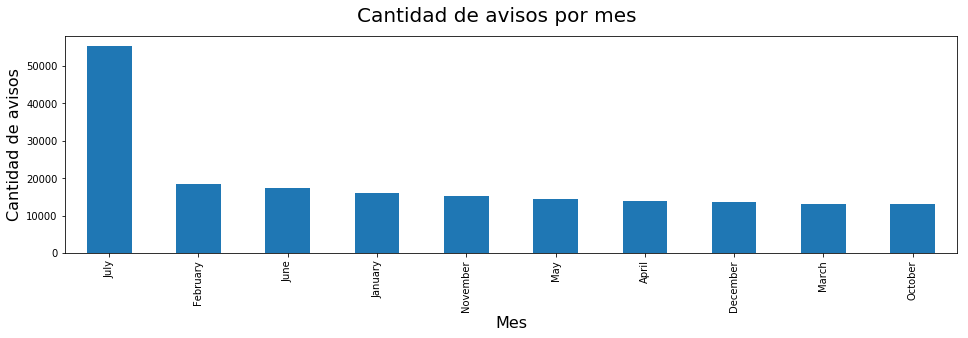

In [20]:
fig = plt.figure()

# para guardar el grafico figsize=(16,8)
ax = data.month.value_counts()[0:10].plot(kind='bar',figsize=(16,4));

fig.suptitle('Cantidad de avisos por mes', fontsize=20)
ax.set_xlabel('Mes', fontsize= 16)
ax.set_ylabel('Cantidad de avisos', fontsize= 16);

fig.savefig('avisosPorMes.jpg');

Según estos dos últimos gráficos se plantea que la mayor oferta de viviendas destinadas para la venta se dá en el año 2016 y casi la primera mitad del 2017 (incluyendo al mes de Julio), esto podría ser por el otorgamiento de créditos a la compra de viviendas que se ha tornado cada vez más creciente.

# Porcentaje de los tipos de propiedades durante los años

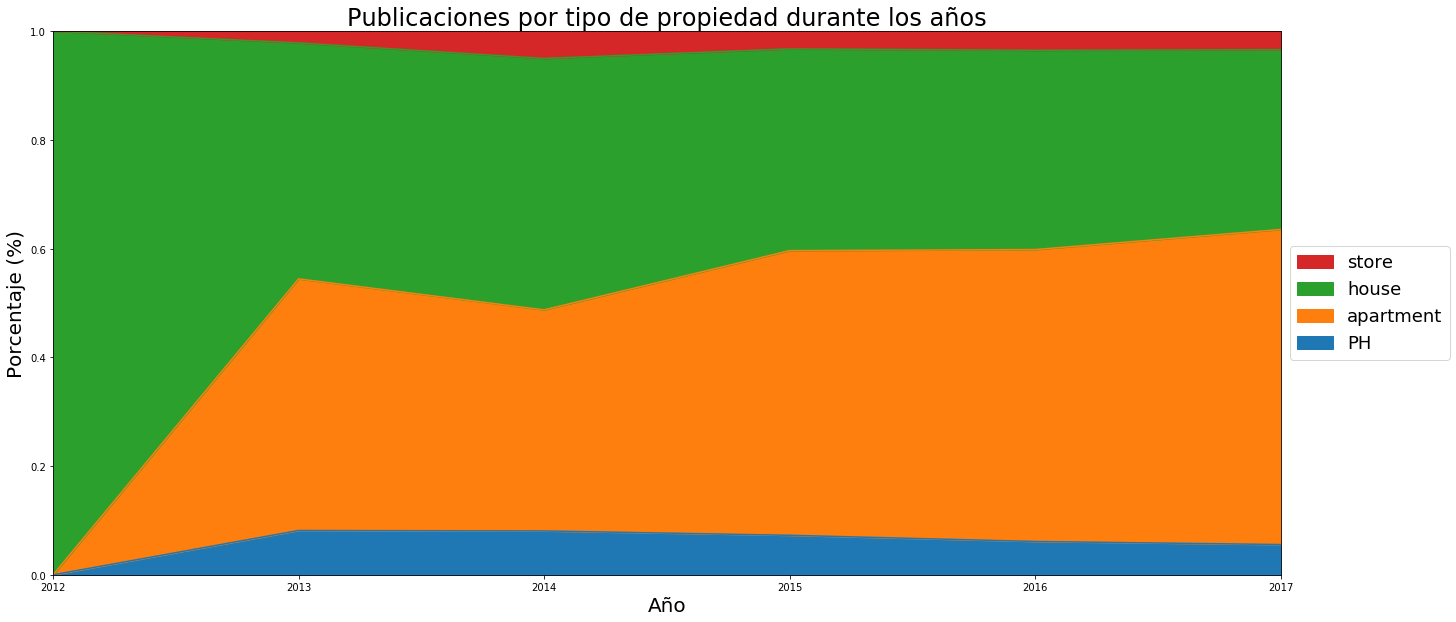

In [21]:
property_type_by_year = pd.DataFrame(data.groupby(['property_type','year']).size())
property_type_by_year.columns = ['num']

property_type_by_year.reset_index(inplace=True)

pivoted = pd.pivot_table(property_type_by_year,values='num',columns='property_type', index='year')
pivoted = pivoted.divide(pivoted.sum(axis=1), axis=0)

fig = plt.figure()

plt.title('Publicaciones por tipo de propiedad durante los años', fontsize=24)
ax = pivoted.plot(kind='area', stacked=True,figsize=(22,10),ax=fig.gca())
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1],loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize= 18)
ax.set_ylabel('Porcentaje (%)', fontsize=20);
ax.set_xlabel('Año', fontsize=20);
ax.set_ylim(0,1)
plt.show()

fig.savefig('publicacionesPorTipoPropiedad.jpg');

Aumentó la oferta de departamentos. Podrían tratarse de viviendas nuevas

# ¿Qué tipo de propiedad es la que más se publicó?

In [22]:
apartment_year = data.loc[data.property_type == 'apartment',['year']]
house_year = data.loc[data.property_type == 'house',['year']]
ph_year = data.loc[data.property_type == 'PH',['year']]
store_year = data.loc[data.property_type == 'store',['year']]

In [23]:
data_apartment = apartment_year['year'].value_counts().sort_index()
data_house = house_year['year'].value_counts().sort_index()
data_ph = ph_year['year'].value_counts().sort_index()
data_store = store_year['year'].value_counts().sort_index()

data_apartment.rename('Apartment', inplace=True)
data_house.rename('House', inplace=True)
data_ph.rename('PH', inplace=True)
data_store.rename('Store', inplace=True)

data_by_year = pd.concat([data_apartment,data_house, data_ph, data_store], axis=1)
print('Datos por año\n',data_by_year)

Datos por año
       Apartment  House      PH   Store
2012        NaN      3     NaN     NaN
2013      193.0    181    34.0     9.0
2014     1768.0   2011   351.0   218.0
2015    12462.0   8831  1730.0   775.0
2016    45652.0  31160  5214.0  2990.0
2017    57691.0  32914  5541.0  3389.0


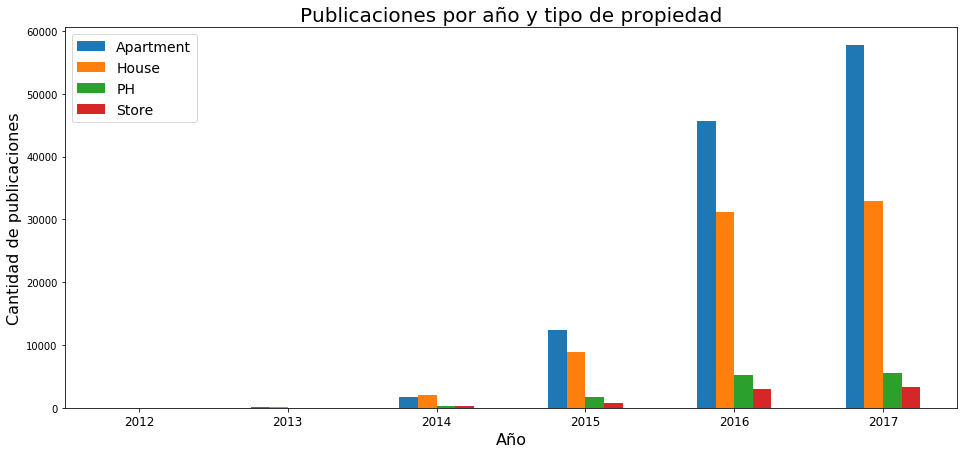

In [24]:
fig = plt.figure()

### no guarda el gráfico

year = ['2012','2013','2014','2015','2016','2017']

ax2 = data_by_year.plot(kind='bar', figsize=(16,7))

ax2.set_title('Publicaciones por año y tipo de propiedad', fontsize=20)
ax2.set_xlabel('Año', fontsize=16)
ax2.set_ylabel('Cantidad de publicaciones', fontsize=16)
ax2.set_xticklabels(year,rotation='horizontal', fontsize=12)
ax2.legend(prop={'size':14});

fig.savefig('publicacionesPorAnioYPropiedad.jpg');

Este gráfico indica que parecerían más rentables para la venta las casas y los departamentos que los PH y las tiendas.
Habría que analizarse en qué zonas se propicia más la venta de casas y departamentos.

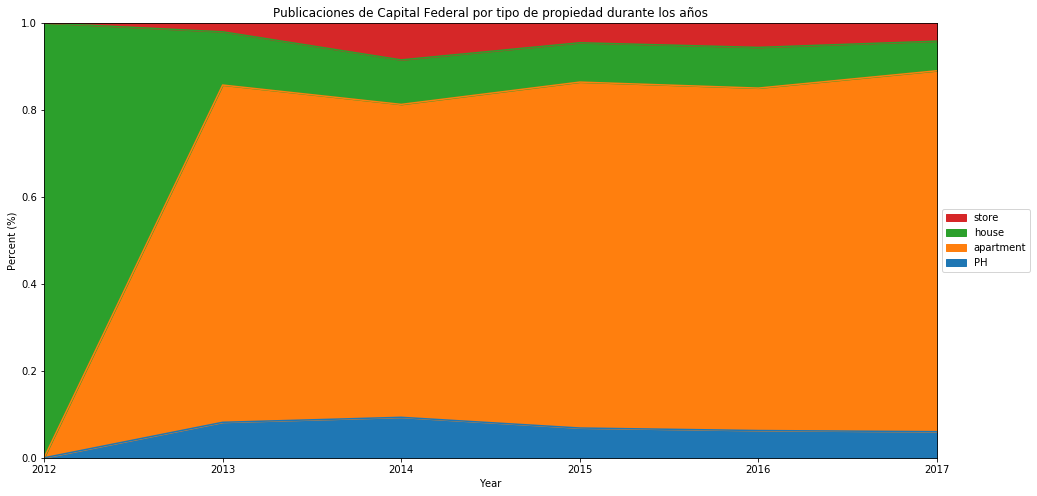

In [25]:
caba_year = pd.DataFrame(data.loc[data.state_name == 'Capital Federal'].groupby(['property_type','year']).size())
caba_year.columns = ['num']

caba_year.reset_index(inplace=True)

pivoted = pd.pivot_table(caba_year,values='num',columns='property_type', index='year')
pivoted = pivoted.divide(pivoted.sum(axis=1), axis=0)

f = plt.figure()
plt.title('Publicaciones de Capital Federal por tipo de propiedad durante los años', color='black')
ax = pivoted.plot(kind='area', stacked=True,figsize=(16,8),ax=f.gca())
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1],loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set_ylabel('Percent (%)');
ax.set_xlabel('Year');
ax.set_ylim(0,1)
plt.show()

En Capital Federal aumentó considerablemente la venta de departamentos en estos últimos años

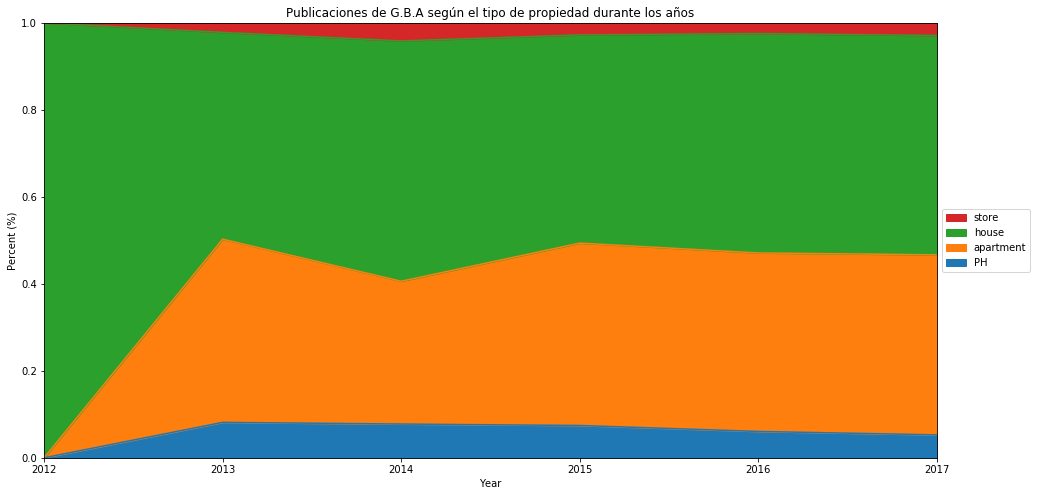

In [26]:
gba_year = pd.DataFrame(data.loc[data.state_name.str.contains('G.B.A')].groupby(['property_type','year']).size())
gba_year.columns = ['num']

gba_year.reset_index(inplace=True)

pivoted = pd.pivot_table(gba_year,values='num',columns='property_type', index='year')
pivoted = pivoted.divide(pivoted.sum(axis=1), axis=0)

f = plt.figure()
plt.title('Publicaciones de G.B.A según el tipo de propiedad durante los años', color='black')
ax = pivoted.plot(kind='area', stacked=True,figsize=(16,8),ax=f.gca())
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1],loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set_ylabel('Percent (%)');
ax.set_xlabel('Year');
ax.set_ylim(0,1)
plt.show()

En el Gran Buenos Aires es bastante más frecuente la venta de casas que la de departamentos.

#  Cantidad de publicaciones en  Capital Federal y G.B.A. 

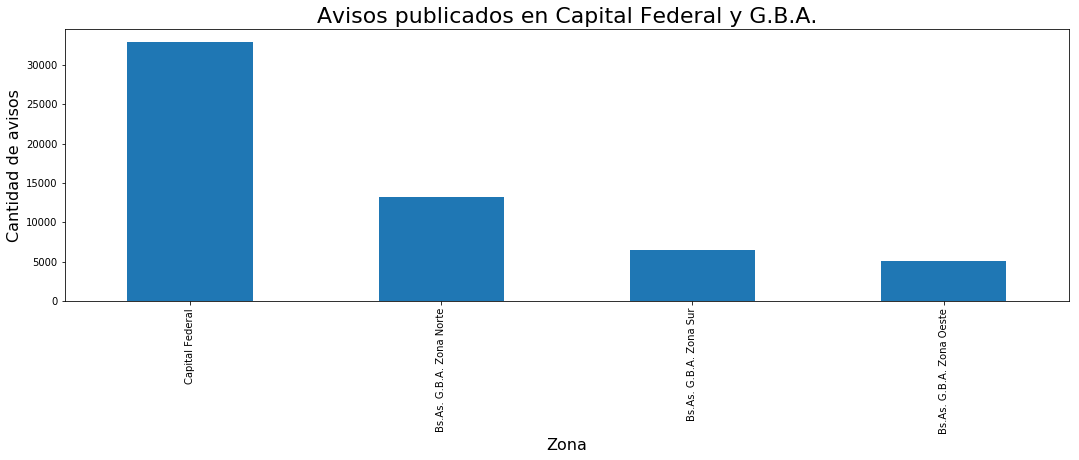

In [27]:
fig = plt.figure()

filtered = data.loc[(data.year == 2017) & (data.property_type == 'apartment')]

grouped = filtered[['state_name','price_usd_per_m2']].groupby('state_name').agg([np.size, np.mean])
# por lo menos 50 ventas
ax = grouped.loc[grouped[('price_usd_per_m2', 'size')] > 50, : ][('price_usd_per_m2','size')].sort_values(ascending=False)[0:20].plot(kind='bar',figsize=(18,5));

ax.set_title('Avisos publicados en Capital Federal y G.B.A.', fontsize= 22)
ax.set_xlabel('Zona', fontsize= 16)
ax.set_ylabel('Cantidad de avisos', fontsize= 16)

fig.savefig('avisos_cab_gba.jpg');

# Lugares donde se registró la mayor cantidad de avisos

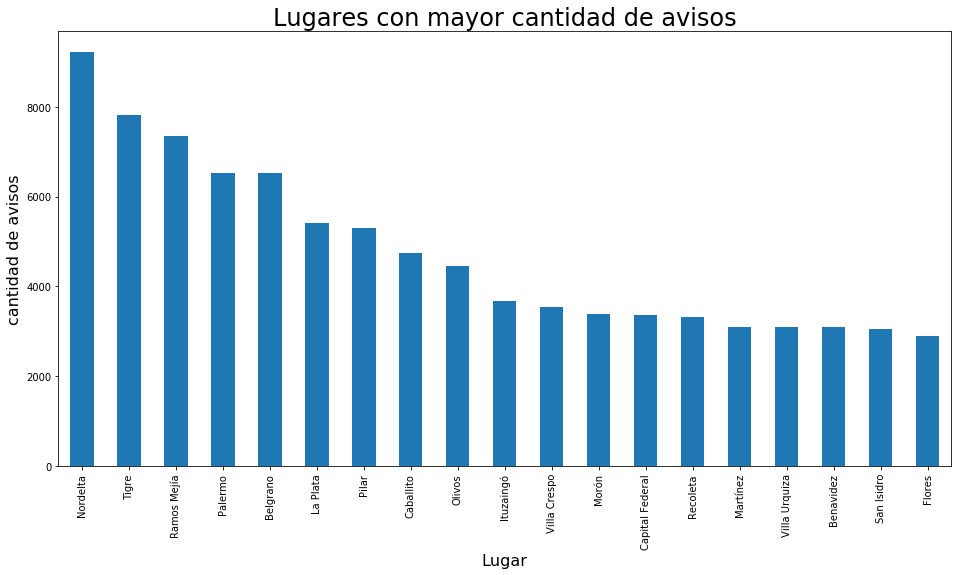

In [28]:
fig = plt.figure()

plt.title('Lugares con mayor cantidad de avisos', fontsize=24)

ax = data['place_name'].value_counts()[0:19].plot(kind='bar',figsize=(16,8));

ax.set_xlabel('Lugar', fontsize= 16)
ax.set_ylabel('cantidad de avisos', fontsize= 16)

fig.savefig('top20CantidadDeAvisos.jpg');

Se publican más avisos de Capital Federal y de la Zona norte de G.B.A ( que por lo general es más cara que el resto del Gran Buenos Aires), pero tambien hay avisos de G.B.A Oeste .Esto indica que la venta de casas no fue alentada solamente en zonas donde el precio por metro cuadrado en dólares es más caro.

En qué moneda está fijado el precio de estas propiedades:

In [30]:
data.currency.value_counts()

USD    182877
ARS      8575
PEN         2
Name: currency, dtype: int64

# Superficie total promedio( m2 ) a través del tiempo

In [31]:
grouped = data[['property_type','surface_total_in_m2','created_on','description']].dropna().drop_duplicates()
grouped.created_on = pd.to_datetime(grouped.created_on, format='%Y/%m/%d')
Prop_TotalSurf =grouped[['property_type','surface_total_in_m2','description']]
Prop_TotalSurf['Periodo'] = grouped['created_on'].map(lambda x: x.strftime('%Y-%m'))
#filtro valores de surface_total_in_m2
Prop_TotalSurf = Prop_TotalSurf.loc[((Prop_TotalSurf.surface_total_in_m2<1000) &\
                                     (Prop_TotalSurf.surface_total_in_m2>100) &\
                                    (Prop_TotalSurf.property_type== 'house')) |\
                                    ((Prop_TotalSurf.surface_total_in_m2<500) &\
                                    ((Prop_TotalSurf.property_type== 'apartment')|\
                                     (Prop_TotalSurf.property_type== 'PH')) &\
                                    (Prop_TotalSurf.surface_total_in_m2>18))\
                                   ]

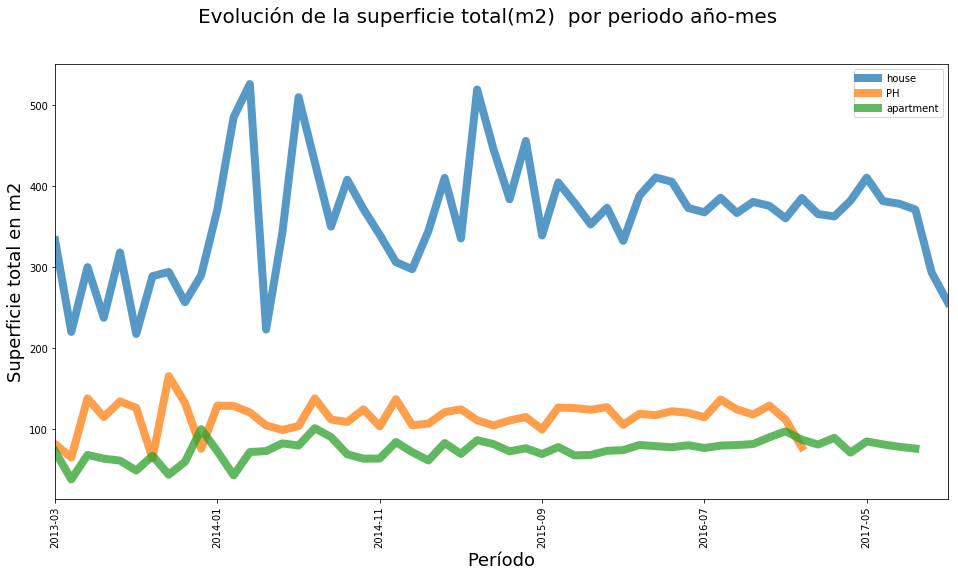

In [32]:
fig = plt.figure()

fig.suptitle('Evolución de la superficie total(m2)  por periodo año-mes', fontsize=20)

Prop_TotalSurf.loc[Prop_TotalSurf.property_type.str.contains('house'),['property_type','surface_total_in_m2','Periodo']].groupby('Periodo')\
                .mean().loc[:,'surface_total_in_m2'].plot(rot=90,linewidth=8,figsize=(16,8),alpha=0.75,label='house');

Prop_TotalSurf.loc[Prop_TotalSurf.property_type.str.contains('PH'),['property_type','surface_total_in_m2','Periodo']].groupby('Periodo')\
                .mean().loc[:,'surface_total_in_m2'].plot(rot=90,linewidth=8,figsize=(16,8),alpha=0.75,label='PH')

ax = Prop_TotalSurf.loc[Prop_TotalSurf.property_type.str.contains('apartment'),['property_type','surface_total_in_m2','Periodo']].groupby('Periodo')\
                .mean().loc[:,'surface_total_in_m2'].plot(rot=90,linewidth=8,figsize=(16,8),alpha=0.75,label='apartment')

ax.set_xlabel('Período', fontsize= 18)
ax.set_ylabel('Superficie total en m2', fontsize= 18)
    
plt.legend();

#fig.savefig('supTotalPorPeriodo.jpg');

Según este gráfico, se muestra que en los primeros años (2013 a 2015) se ofrecían propiedades con menor superficie
en m2, se tendría que analizar si se trataban de viviendas usadas o nuevas para concluir si en la actualidad
se hicieron propiedades más grandes o si se están vendiendo más viviendas usadas.

# Cantidad de publicaciones en Capital Federal de departamentos a través del tiempo según el número de ambientes

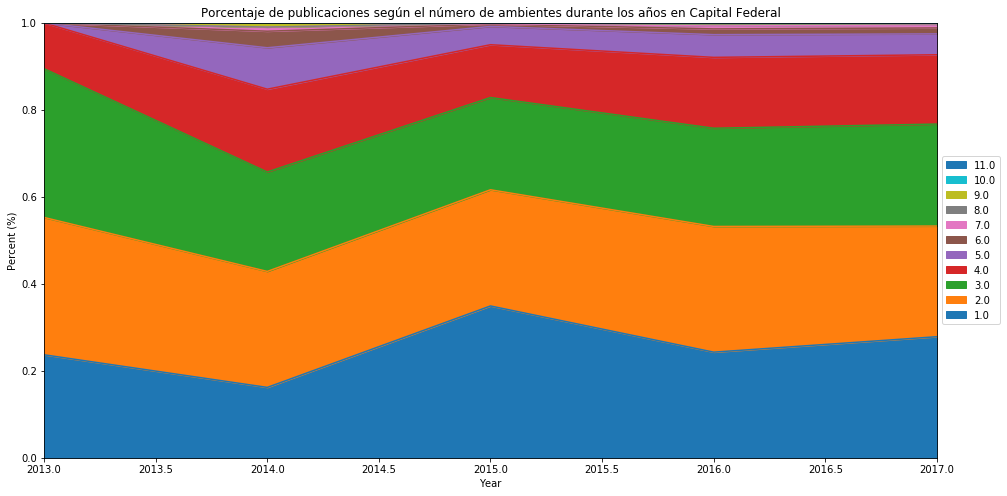

In [33]:
gy = pd.DataFrame(data.loc[(data.state_name == 'Capital Federal') & (data.property_type=='apartment')\
                          & (data.rooms < 12)].groupby(['rooms','year']).size())
gy.columns = ['num']

gy.reset_index(inplace=True)

pivoted = pd.pivot_table(gy,values='num',columns='rooms', index='year')
pivoted = pivoted.divide(pivoted.sum(axis=1), axis=0)

f = plt.figure()
plt.title('Porcentaje de publicaciones según el número de ambientes durante los años en Capital Federal', color='black')
ax = pivoted.plot(kind='area', stacked=True,figsize=(16,8),ax=f.gca())
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1],loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set_ylabel('Percent (%)');
ax.set_xlabel('Year');
ax.set_ylim(0,1)
plt.show()

# Evolución en el tiempo de la superficie total promedio en m2 de los departamentos de 2 ambientes

In [34]:
rooms= data.loc[(data.property_type == 'apartment') & (data.rooms < 12),['rooms','state_name','surface_total_in_m2','created_on']].dropna().drop_duplicates(keep='first')
rooms.loc[rooms['state_name'].str.contains('G.B.A'),'state_name']= 'GBA'
rooms.rooms = rooms.rooms.astype(int)


totalS = rooms.loc[(rooms.surface_total_in_m2<300) & (rooms.surface_total_in_m2>25) & (rooms.rooms == 2),['created_on','surface_total_in_m2','state_name']]
totalS.created_on = pd.to_datetime(totalS.created_on, format='%Y/%m/%d')
totalS['Periodo'] = totalS['created_on'].map(lambda x: x.strftime('%Y-%m'))
totalS.head(10)

,created_on,surface_total_in_m2,state_name,Periodo
29,2013-03-23,60.0,GBA,2013-03
31,2013-03-23,37.0,GBA,2013-03
38,2013-04-12,38.0,GBA,2013-04
63,2013-05-15,62.0,GBA,2013-05
71,2013-05-24,50.0,GBA,2013-05
91,2013-05-24,42.0,GBA,2013-05
93,2013-05-24,80.0,GBA,2013-05
101,2013-05-24,40.0,GBA,2013-05
110,2013-05-24,36.0,GBA,2013-05
111,2013-05-24,38.0,GBA,2013-05


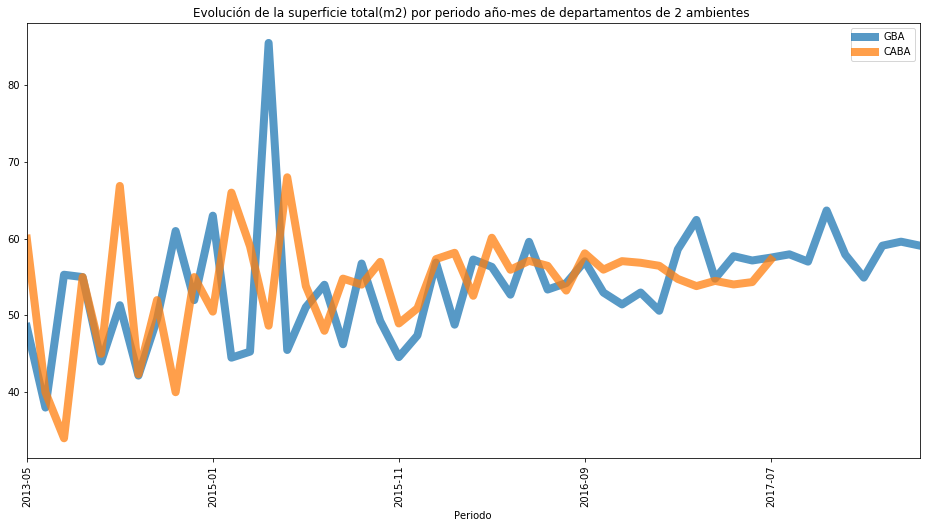

In [35]:
plt.figure()
totalS.loc[totalS.state_name== 'GBA',['state_name','surface_total_in_m2','Periodo']].groupby('Periodo')\
                .mean().loc[:,'surface_total_in_m2'].plot(rot=90,linewidth=8,figsize=(16,8),alpha=0.75,label='GBA',title='Evolución de la superficie total(m2) por periodo año-mes de departamentos de 2 ambientes');

totalS.loc[totalS.state_name== 'Capital Federal',['state_name','surface_total_in_m2','Periodo']].groupby('Periodo')\
                .mean().loc[:,'surface_total_in_m2'].plot(rot=90,linewidth=8,figsize=(16,8),alpha=0.75,label='CABA',title='Evolución de la superficie total(m2) por periodo año-mes de departamentos de 2 ambientes ');
plt.legend();

En esta visualización se puede ver que en G.B.A se pusieron a la venta de manera más frecuente
departamentos de 2 ambientes de menor tamaño que en Capital Federal. Se tendría que tener más información
para poder aseverar si se trataban de viviendas nuevas.


In [36]:
ndata = data.drop_duplicates()
nprop_year = ndata.loc[ ((ndata.property_type == 'house') | \
                         (ndata.property_type == 'PH') | \
                         (ndata.property_type == 'apartment') ) &\
                         (ndata.description.str.contains('nuevo') |\
                         ndata.description.str.contains('nueva') |\
                         ndata.description.str.contains('estrenar')),\
                        ['year','description','property_type','state_name']]

nprop_year.dropna(inplace=True)
nprop_year.head(10)

,year,description,property_type,state_name
4,2012,Casa Multifamiliar en Mataderos!!! Sobre lote ...,house,Capital Federal
29,2013,VENTA DEPARTAMENTO 2 AMBIENTES EN RAMOS MEJÍA....,apartment,Bs.As. G.B.A. Zona Oeste
34,2013,VENTA TRIPLEX 4 AMBIENTES EN RAMOS MEJÍA.Excel...,apartment,Bs.As. G.B.A. Zona Oeste
35,2013,VENTA TRIPLEX 4 AMBIENTES EN RAMOS MEJÍA.Excel...,apartment,Bs.As. G.B.A. Zona Oeste
36,2013,VENTA TRIPLEX 4 AMBIENTES EN RAMOS MEJÍA.Excel...,apartment,Bs.As. G.B.A. Zona Oeste
106,2013,"hermoso departamento en Portezuelo ,amplio bal...",apartment,Bs.As. G.B.A. Zona Norte
107,2013,Hermosa casa en dos plantas reciclada a nueva ...,house,Capital Federal
116,2013,"excelente casa sobre terreno de 10 x 23, const...",house,Bs.As. G.B.A. Zona Sur
135,2013,Duplex de 4 amb. a estrenar. Cuentan con livin...,house,Bs.As. G.B.A. Zona Oeste
152,2013,"3 Duplex de categora a estrenar, constan de en...",house,Bs.As. G.B.A. Zona Sur


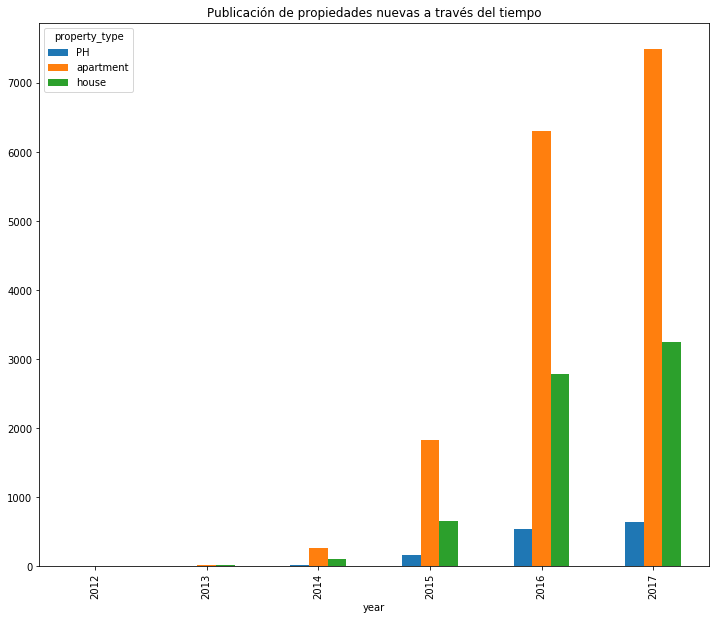

In [37]:
df=nprop_year.groupby(['year','property_type']).size()
df=df.unstack()
df.plot(kind='bar',figsize=(12,10),title='Publicación de propiedades nuevas a través del tiempo');


Según este gráfico se están vendiendo mayor cantidad de propiedades nuevas en estos últimos años , 
y junto a los gráficos anteriores se concluye que poseen mayor superficie comparadas con las de años anteriores. Tendría que analizarse si esto ocurre en GBA o en Capital Federal ya que en GBA no hay zonas con muchos edificios como
en Capital Federal y por otra parte, en GBA hay más oferta de superficies no cubiertas sobre las cuales 
se puede construir.

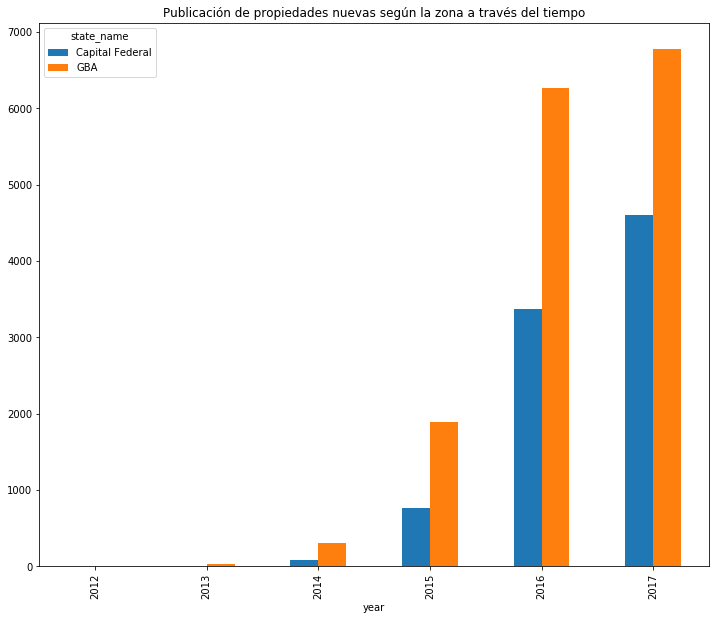

In [38]:
nprop_year.loc[nprop_year['state_name'].str.contains('G.B.A'),'state_name']= 'GBA'
df=nprop_year.groupby(['year','state_name']).size()
df=df.unstack()
df.plot(kind='bar',figsize=(12,10),title='Publicación de propiedades nuevas según la zona a través del tiempo');


Este grafico denota que la construcción fue más alentada en GBA que en CABA, aunque hay que considerar
que Capital Federal cubre menos superficie de la provincia de Buenos Aires comparando con GBA,
por lo tanto también es significativa la venta de viviendas nuevas en Capital Federal.

# Cantidad de ambientes de los departamentos en venta

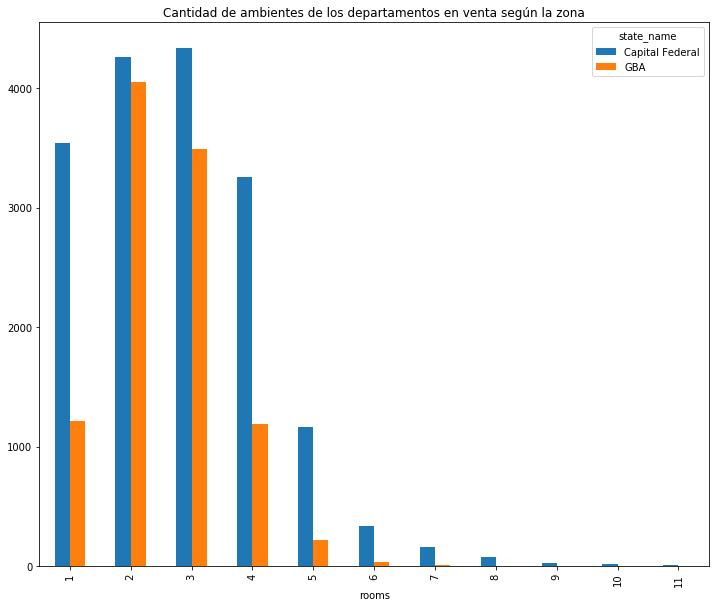

In [39]:
rooms= data.loc[(data.property_type == 'apartment') & (data.rooms < 12),['rooms','state_name','surface_total_in_m2','created_on']].dropna().drop_duplicates(keep='first')
#Pongo todos los state_name que contengan G.B.A en uno solo
rooms.loc[rooms['state_name'].str.contains('G.B.A'),'state_name']= 'GBA'
#rooms es float, por lo tanto cambio a int para que se vea mejor en el gráfico
rooms.rooms = rooms.rooms.astype(int)
df=rooms.groupby(['rooms','state_name']).size()
df=df.unstack()
df.plot(kind='bar',figsize=(12,10),title='Cantidad de ambientes de los departamentos en venta según la zona')

En Capital Federal es más común encontrar departamentos con mayor cantidad de ambientes que en 
GBA.Podrían tratarse de propiedades lujosas o de departamentos que no tienen tanta superficie total en m2
y que tienen mayores divisiones ya que, por el gráfico de la superficie total en m2 a través del tiempo, 
la superficie de los departamentos no presentó muchas variaciones que determinen que se hicieron departamentos
más grandes.

In [40]:
rooms_vs_sup = ndata.loc[(ndata.state_name=='Capital Federal') & (ndata.rooms <12) &\
                         (ndata.property_type=='apartment')\
                         ,['rooms','surface_total_in_m2']].dropna()
rooms_vs_sup = rooms_vs_sup.loc[(rooms_vs_sup.surface_total_in_m2 >0) & (rooms_vs_sup.surface_total_in_m2 < 400) ]
rooms_vs_sup.describe()

,rooms,surface_total_in_m2
count,30069.000000,30069.000000
mean,2.536865,82.778277
std,1.360936,63.010674
min,1.000000,10.000000
25%,1.000000,40.000000
50%,2.000000,60.000000
75%,3.000000,99.000000
max,11.000000,399.000000


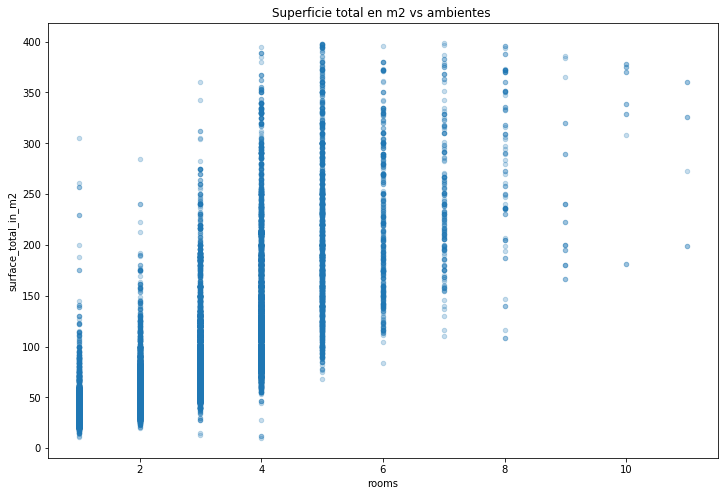

In [41]:
rooms_vs_sup.plot.scatter('rooms','surface_total_in_m2',title='Superficie total en m2 vs ambientes ',alpha=0.25,figsize=(12,8));

# Relación entre número de ambientes y valor de expensas 

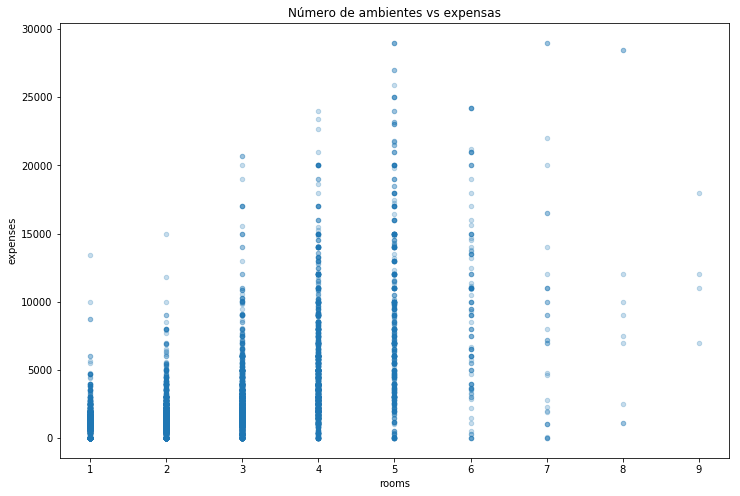

In [42]:
rooms_vs_exp = data.drop_duplicates()
#pongo expensas menor a 30000 porque actualmente hay departamentos en torres de nombre muy conocido en donde las expensas
#superan los 10,000 ARS
rooms_vs_exp = data.loc[(data.state_name=='Capital Federal') & (data.rooms <10) & (data.expenses<30000),['expenses','rooms','place_name']].dropna()
rooms_vs_exp.expenses = rooms_vs_exp.expenses.astype(int)

rooms_vs_exp.plot.scatter('rooms','expenses',alpha=0.25,figsize=(12,8),title='Número de ambientes vs expensas');

Según la visualización anterior, el número de ambientes no tendría tanta influencia sobre las expensas.
Podría tener más influencia la zona en la que está ubicada la propiedad.

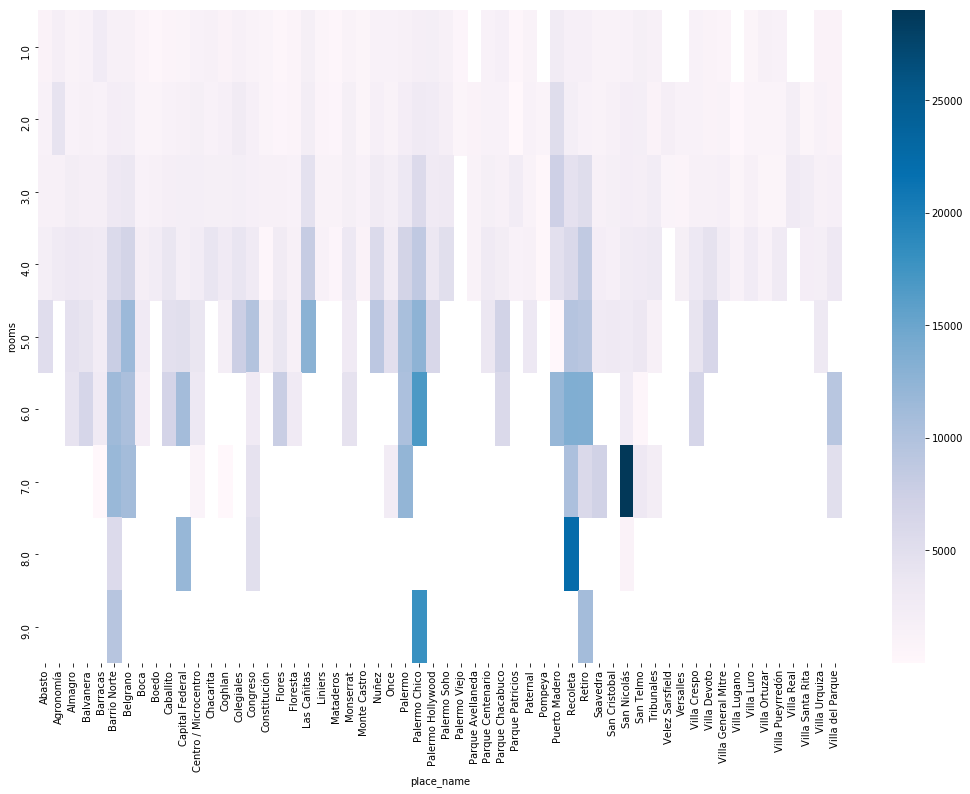

In [43]:
pivoted = pd.pivot_table(rooms_vs_exp,values='expenses',columns='place_name', \
               index='rooms')
fig, ax = plt.subplots(figsize=(18,12))   
sns.heatmap(pivoted,cmap='PuBu');


De acuerdo al gráfico anterior, el precio de las expensas se fijan más por la zona de la propiedad que por la cantidad de ambientes.

# Valor promedio del m2 en USD para los departamentos en el 2017 según la cantidad de ambientes

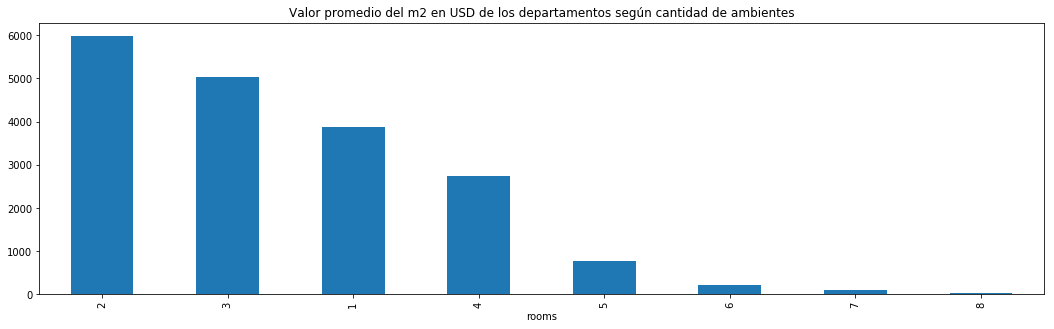

In [44]:
filtered = data.loc[((data.year == 2017) & (data.property_type == 'apartment') & (data.price_usd_per_m2< 9200)),['price_usd_per_m2','rooms'] ].dropna()
filtered.rooms = filtered.rooms.astype(int)
grouped = filtered[['rooms','price_usd_per_m2']].groupby('rooms').agg([np.size, np.mean])
grouped.loc[grouped[('price_usd_per_m2', 'size')] > 10, : ][('price_usd_per_m2','size')].sort_values(ascending=False).plot(kind='bar',figsize=(18,5),title='Valor promedio del m2 en USD de los departamentos según cantidad de ambientes');

El gráfico anterior demuestra que se están vendiendo propiedades más caras en este año

# Cómo influye el número de piso en el precio del m2 en USD para departamentos de hasta 3 ambientes en el año 2017

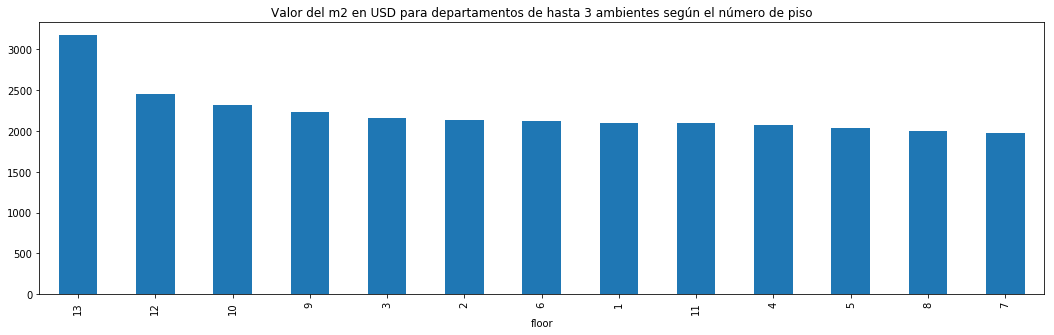

In [45]:
filtered = data.loc[(data.year == 2017) & (data.property_type == 'apartment') & (data.rooms <3) & (data.price_usd_per_m2<9200),['floor','price_usd_per_m2']]
filtered.dropna(inplace=True)
filtered.floor = filtered.floor.astype(int)
grouped = filtered[['floor','price_usd_per_m2']].groupby('floor').agg([np.size, np.mean])
grouped.loc[grouped[('price_usd_per_m2', 'size')] > 10, : ][('price_usd_per_m2','mean')].sort_values(ascending=False).plot(kind='bar',figsize=(18,5),title='Valor del m2 en USD para departamentos de hasta 3 ambientes según el número de piso');

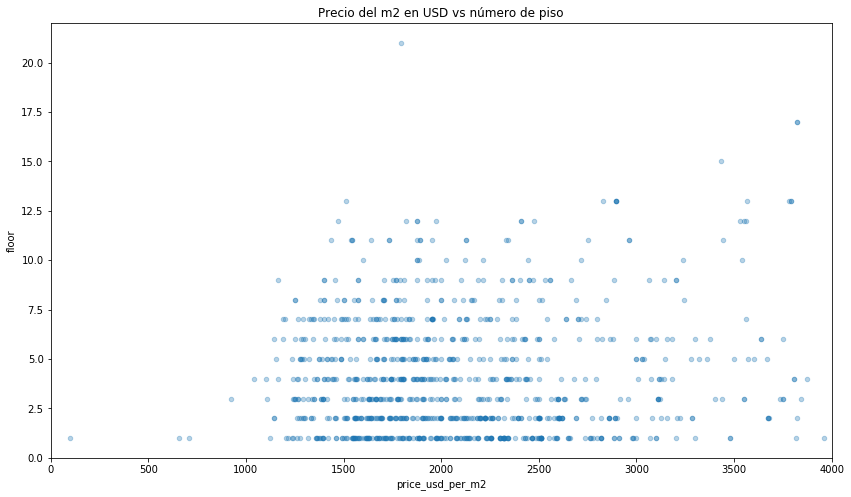

In [47]:
data_apart_floor = data.loc[(data.year == 2017) & (data.property_type == 'apartment') &  (data.rooms <3) & (data.price_usd_per_m2<9200),['floor','price_usd_per_m2']].dropna()
data_apart_floor = data_apart_floor.astype(int)
ax = plt.subplot(111)
data_apart_floor.plot.scatter('price_usd_per_m2','floor',alpha=0.32,figsize=(14,8),ax=ax, title='Precio del m2 en USD vs número de piso');
ax.set_xlim(0,4000);

El número de piso no tiene tanta influencia en el valor de la propiedad ya que para departamentos ubicados en el mismo piso,
se puede encontrar un rango de precios muy variable.

¿De cuántos ambientes son las casas ofrecidas?

In [49]:
houses= data.loc[(data.property_type == 'house') & (data.rooms<15) & (data.price_usd_per_m2<9200),['created_on','price_usd_per_m2','state_name','place_name','rooms']].dropna()

houses.rooms.value_counts()

4.0     4419
3.0     3337
5.0     2670
6.0      870
2.0      387
7.0      363
1.0      107
8.0       76
10.0      36
9.0       32
11.0      11
12.0       3
13.0       2
14.0       1
Name: rooms, dtype: int64

Top 10 zonas con más avisos que ofertan casas de 4 ambientes en GBA y en Capital Federal

In [50]:
#selecciono las casas de 4 ambientes
houses = houses.loc[(houses.rooms==4) & (houses.price_usd_per_m2>15 ),:]

#calculo el top 10 de avisos en gba para el tipo de vivienda seleccionado
top10gba =houses.loc[(houses.state_name.str.contains('G.B.A')),['place_name']]\
                .groupby('place_name')['place_name'].agg(['size'])\
                .sort_values('size', ascending=False).head(10).reset_index()
        
#calculo el top 10 de avisos en Capital Federal para el tipo de vivienda seleccionado
top10caba =houses.loc[(houses.state_name=='Capital Federal'),['place_name']]\
                .groupby('place_name')['place_name'].agg(['size']).sort_values\
                ('size', ascending=False).head(10).reset_index()
        
#concateno para tener una lista de lugares con mayor cantidad de avisos de Capital Federal y GBA para comprar
mixedtop = pd.concat([top10gba,top10caba])
mixedtop

,place_name,size
0,Ramos Mejía,527
1,Haedo,309
2,Ituzaingó,235
3,Tigre,186
4,Caseros,107
5,Villa Luzuriaga,106
6,Escobar,98
7,Olivos,98
8,San Justo,96
9,Villa Ballester,84


In [51]:
#hago un merge de los lugares que figuraron en los top y los avisos de las casas de 4 amb 
selected_houses = pd.merge(houses,mixedtop,how='inner', on=['place_name'])
selected_houses.head(10)

,created_on,price_usd_per_m2,state_name,place_name,rooms,size
0,2013-05-05,921.052632,Capital Federal,Barracas,4.0,15
1,2016-03-16,983.050847,Capital Federal,Barracas,4.0,15
2,2016-04-04,1000.000000,Capital Federal,Barracas,4.0,15
3,2016-04-26,968.992248,Capital Federal,Barracas,4.0,15
4,2017-06-28,1450.777202,Capital Federal,Barracas,4.0,15
5,2016-08-09,671.428571,Capital Federal,Barracas,4.0,15
6,2016-08-23,890.688259,Capital Federal,Barracas,4.0,15
7,2016-12-13,1117.318436,Capital Federal,Barracas,4.0,15
8,2017-02-16,1007.194245,Capital Federal,Barracas,4.0,15
9,2016-03-16,983.050847,Capital Federal,Barracas,4.0,15


In [52]:
selected_houses = selected_houses[['created_on','place_name','price_usd_per_m2','state_name']]
selected= selected_houses.pivot_table(index='created_on',columns=['place_name','state_name'])
selected.columns = selected.columns.droplevel()
meds = selected.median()
selected = selected[meds.index]

In [53]:
#se puede apreciar que la mediana en Capital Federal no es siempre mayor a la de GBA
meds.sort_values(ascending=False)

place_name       state_name              
Belgrano         Capital Federal             1976.923077
Villa Urquiza    Capital Federal             1882.379249
Villa Devoto     Capital Federal             1800.000000
Caballito        Capital Federal             1750.760269
Saavedra         Capital Federal             1630.434783
Olivos           Bs.As. G.B.A. Zona Norte    1607.017544
Ramos Mejía      Bs.As. G.B.A. Zona Oeste    1283.332001
Floresta         Capital Federal             1198.109568
Liniers          Capital Federal             1104.516807
Haedo            Bs.As. G.B.A. Zona Oeste    1043.460925
Mataderos        Capital Federal             1036.842702
Villa Luzuriaga  Bs.As. G.B.A. Zona Oeste    1033.818959
Barracas         Capital Federal              976.021548
San Justo        Bs.As. G.B.A. Zona Oeste     947.518168
Villa Lugano     Capital Federal              937.500000
Escobar          Bs.As. G.B.A. Zona Norte     900.000000
Tigre            Bs.As. G.B.A. Zona Norte     

In [54]:
Media_price = selected_houses.loc[:,['price_usd_per_m2']].mean()
Media_price

price_usd_per_m2    1161.171759
dtype: float64

# Boxplot del precio en USD por m2 por zonas que venden casas de 4 ambientes

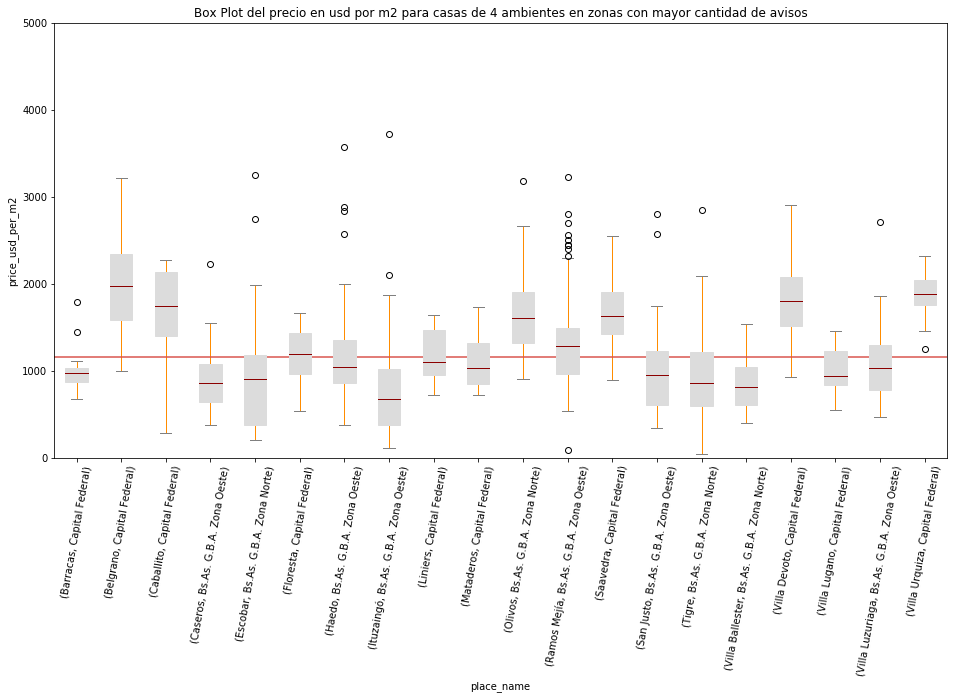

In [55]:
props = dict(boxes="gainsboro", whiskers="DarkOrange", medians="DarkRed", caps="Gray")
boxplot=selected.plot.box(return_type='dict', figsize=(16,8),rot=80,title='Box Plot del precio en usd por m2 para casas de 4 ambientes en zonas con mayor cantidad de avisos',color=props, patch_artist=True);

ax=plt.gca()
ax.set_ylim([0,5000]);
ax.set_ylabel('price_usd_per_m2');
ax.set_xlabel('place_name');
plt.axhline(Media_price.price_usd_per_m2,color=sns.xkcd_rgb["pale red"])